In [ ]:
%matplotlib inline
from pylab import *
from sci378.stats import *

Version:  0.0.36


`pip install "git+https://github.com/bblais/sci378" --upgrade`


`pip install pyndamics3 --upgrade`

## Two Samples

In [ ]:
drug = (101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101)
placebo = (99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99)

In [ ]:
def logprior(μ1,σ1,μ2,σ2):
    value=0
    
    value+=logNormal(μ1,0,100)
    value+=logJeffreys(σ1)
    value+=logNormal(μ2,0,100)
    value+=logJeffreys(σ2)
    
    return value

def loglikelihood(data,μ1,σ1,μ2,σ2):
    x,y=data
    value=0
        
    value+=logNormal(x-μ1,0,σ1)
    value+=logNormal(y-μ2,0,σ2)
    
    return value
    

In [ ]:
model=MCMCModel((drug,placebo),loglikelihood,logprior,
               μ1=Normal(10,10),    # initial guess for μ1
               σ1=Uniform(0,10),    # initial guess for σ1 (make sure it's positive)
               μ2=Normal(10,10),    # initial guess for μ2
               σ2=Uniform(0,10),    # initial guess for σ2 (make sure it's positive)
               )

Running MCMC 1/3...
Done.
0.80 s
Running MCMC 2/3...
Done.
0.86 s
Running MCMC 3/3...
Done.
0.85 s


<Figure size 1000x800 with 0 Axes>

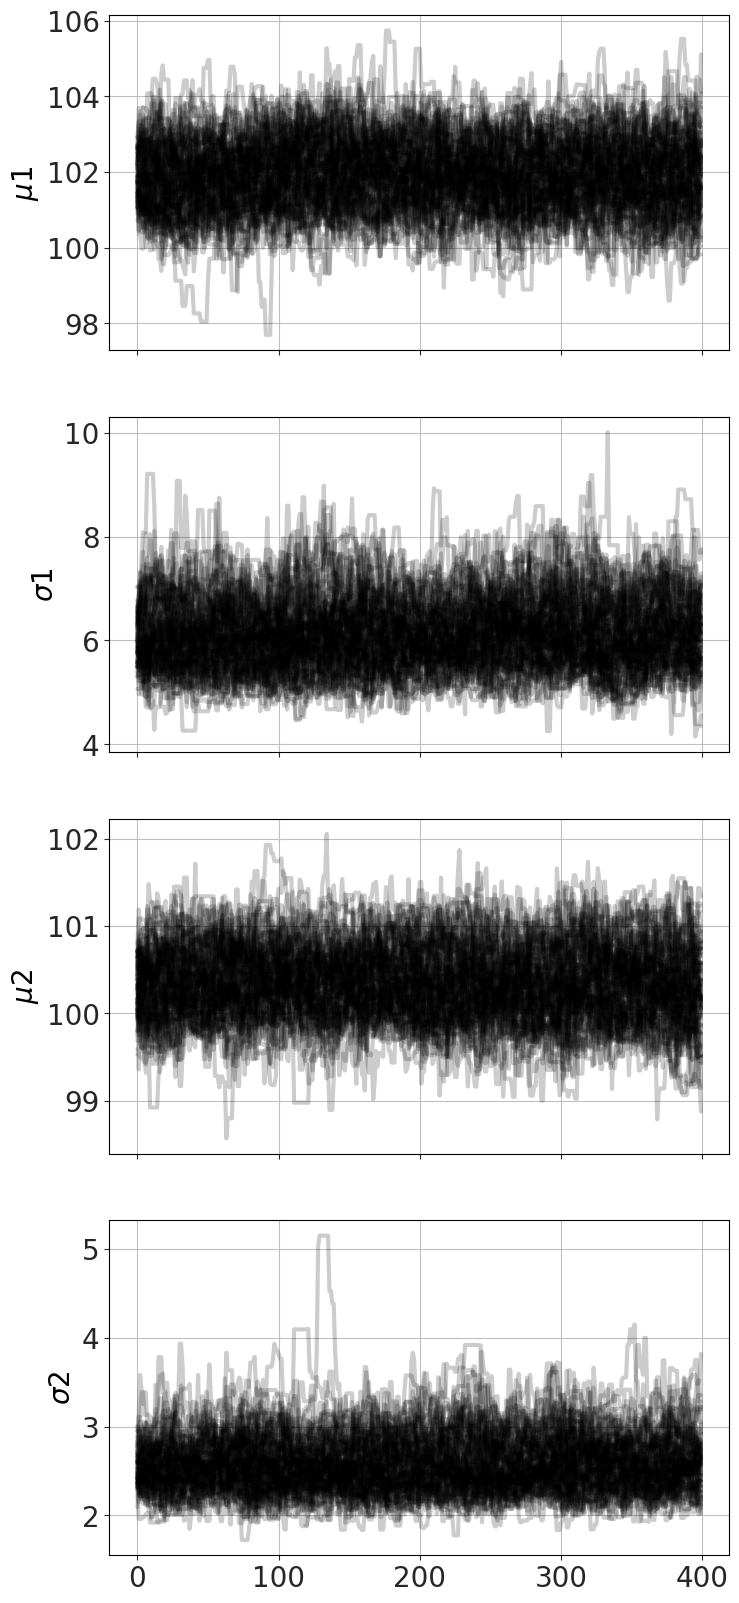

In [ ]:
model.run_mcmc(400,repeat=3,verbose=True)
model.plot_chains()

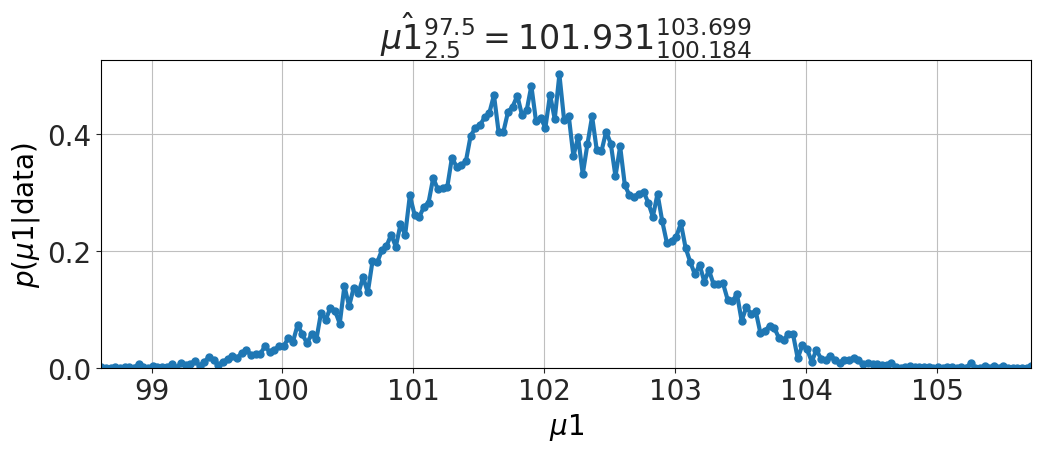

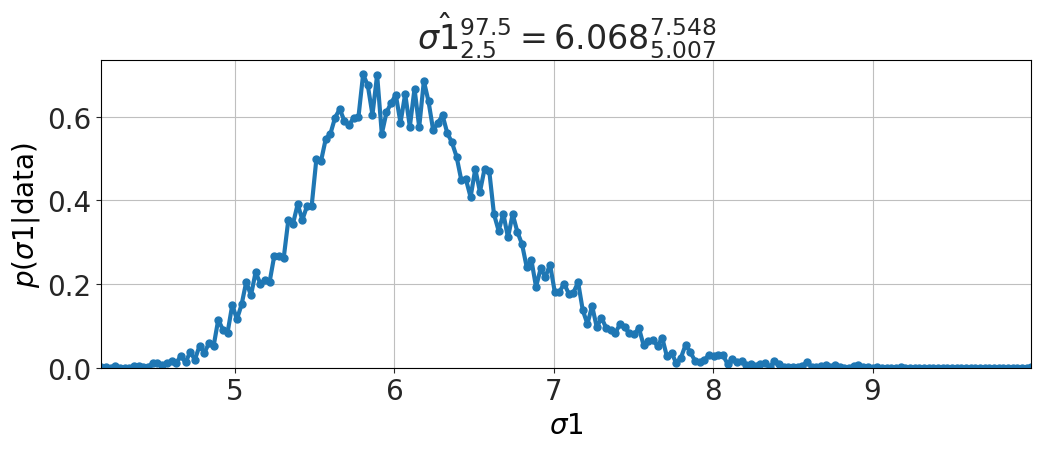

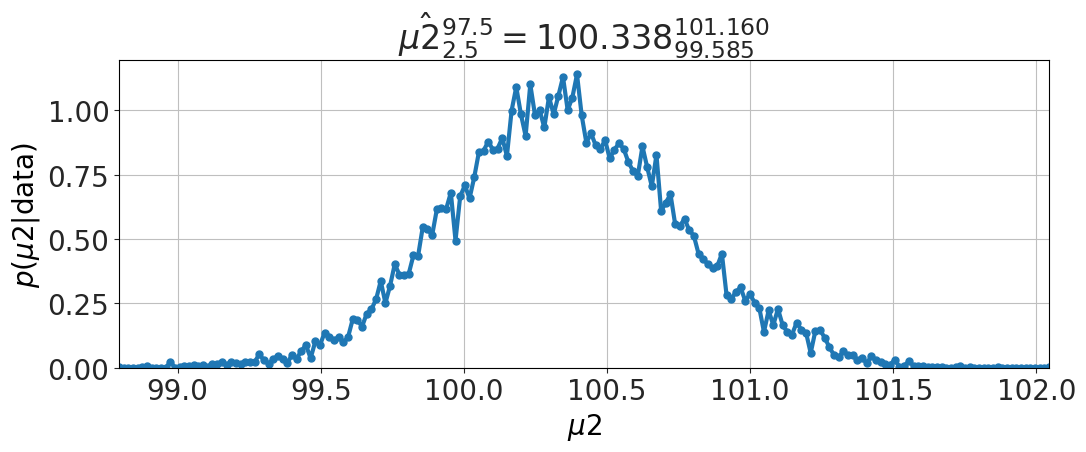

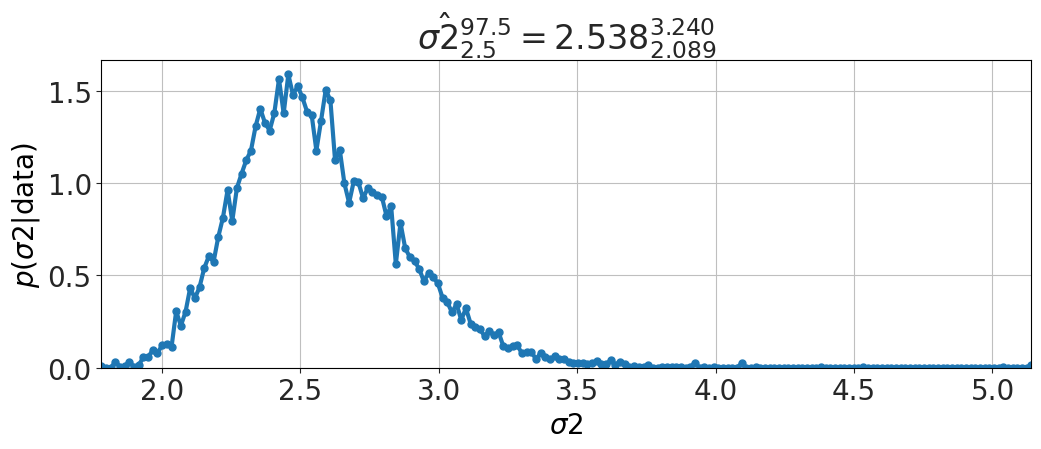

In [ ]:
model.plot_distributions()

In [ ]:
model.P('μ1-μ2<0')

0.052333333333333336